Changes made
- limit the Price to 600,000, since I changed the scraping to limit the max price
- remove any property more than 8 miles from a train station (impossible in London, so an incorrect outlier)

In [1]:
import pandas as pd
# Import matplotlib and seaborn libraries to visualize the data

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing
import globalfunction.pp as pp  # importing

import pandas as pd

df_original = vv.quick_data(publish=True,exceptional_nans=['size'],remove_outliers=True)
df_original.head(50)

remove duplicates: 21347/30784/24837/24943 ==> 21347/21320/21110/21117
21051
==> 21051
dataframe length: 21051
allowing Price to pass with 39 nulls/NANs
allowing add_info to pass with 2442 nulls/NANs
allowing type to pass with 79 nulls/NANs
allowing bedrooms to pass with 908 nulls/NANs
allowing bathrooms to pass with 1426 nulls/NANs
dropping size because 17762 nulls/NANs is too many
dropping other_key_info because 21050 nulls/NANs is too many
allowing bullet_points to pass with 2117 nulls/NANs
allowing station_info to pass with 1 nulls/NANs
dropping hold_type because 14994 nulls/NANs is too many
allowing short_description to pass with 1 nulls/NANs
allowing long_description to pass with 4 nulls/NANs
allowing date_scraped_listing to pass with 1 nulls/NANs
allowing virtualTours to pass with 11 nulls/NANs
allowing rooms to pass with 11 nulls/NANs
allowing nearestAirports to pass with 11 nulls/NANs
allowing nearestStations to pass with 11 nulls/NANs
allowing showSchoolInfo to pass with 11 n

,Description,Price,add_info,distance_to_any_train,type,bedrooms,bathrooms,size,bullet_points,station_info,...,analyticsProperty.priceQualifier,analyticsProperty.propertyId,analyticsProperty.propertySubType,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,borough_name,floorplan_count
ids,,,,,,,,,,,,,,,,,,,,,
124059707,3 bedroom flat for sale,325000.0,"Added on 18/06/2022 by haart, Barkingside",0.5,Flat,3.0,1.0,NaN,2-3 Bedrooms;First Floor Flat;Well Presented T...,"[(0.5, 'Gants Hill Station', 'svg-underground'...",...,Guide Price,124059707.0,Flat,Flats / Apartments,False,False,No Video,Current,Redbridge,4.0
124056446,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.1,Flat,1.0,1.0,NaN,Great Condition;Perfect for a FTB;Close to Exc...,"[(0.1, 'Goodmayes Station', 'svg-nationalrail'...",...,None,124056446.0,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,1.0
124059386,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.3,Flat,1.0,1.0,NaN,1 Bedroom Flat;Excellent condition;Close to Lo...,"[(0.3, 'Goodmayes Station', 'svg-nationalrail'...",...,None,124059386.0,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,1.0
85324458,1 bedroom apartment for sale,225000.0,"Added on 17/05/2022 by haart, Ilford",0.9,Apartment,1.0,1.0,NaN,Purpose Built Second Floor Flat;Double Bedroom...,"[(0.9, 'Barking Station', 'svg-nationalrail;sv...",...,Guide Price,85324458.0,Apartment,Flats / Apartments,False,True,No Video,Current,Redbridge,4.0
113260523,1 bedroom flat for sale,225000.0,Reduced on 11/11/2021 by Sandra Davidson Estat...,0.4,Flat,1.0,1.0,NaN,EPC RATING C;Duplex Flat;One bedroom;Lounge;Ki...,"[(0.4, 'Seven Kings Station', 'svg-nationalrai...",...,Offers in Excess of,113260523.0,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,4.0
116165987,1 bedroom apartment for sale,225000.0,"Added on 18/06/2022 by Outlook, Stratford",0.3,Apartment,1.0,1.0,NaN,Long Lease;Chain Free;Top Floor Flat;0.3 Miles...,"[(0.3, 'Goodmayes Station', 'svg-nationalrail'...",...,Offers in Excess of,116165987.0,Apartment,Flats / Apartments,False,False,No Video,Current,Redbridge,1.0
120508688,1 bedroom flat for sale,225000.0,"Added on 01/03/2022 by haart, Ilford",0.3,Flat,1.0,1.0,NaN,One Bedroom Conversion Flat;Ground Floor;Spaci...,"[(0.3, 'Ilford Station', 'svg-nationalrail'), ...",...,Guide Price,120508688.0,Flat,Flats / Apartments,False,False,No Video,Current,Redbridge,4.0
122634287,1 bedroom apartment for sale,225000.0,"Reduced on 29/04/2022 by Highcastle Estates, L...",0.5,Apartment,1.0,1.0,NaN,Cloakroom;Double Glazing;Fitted Bathroom;Fitte...,"[(0.5, 'Gants Hill Station', 'svg-underground'...",...,None,122634287.0,Apartment,Flats / Apartments,False,True,No Video,Current,Redbridge,4.0
123610880,1 bedroom flat for sale,225000.0,"Added on 23/05/2022 by Strike, London",0.3,Flat,1.0,1.0,NaN,garden;close-to-local-amenities;sought-after-l...,"[(0.3, 'Newbury Park Station', 'svg-undergroun...",...,None,123610880.0,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,1.0


In [3]:
df_original['coarse_compass_direction'] = df_original["address.outcode"].str.extract("([a-zA-Z]+)")
#df_original['type'] = df_original["Description"].str.extract("(house|apartment|flat|maisonette)")
df_original['sq_ft'] = df_original["size"].str.extract("(\d*) sq. ft.")
#df_original['hold_type2'] = df_original["hold_type"].str.replace("Tenure:","").str.strip()

df_original

,Description,Price,add_info,distance_to_any_train,type,bedrooms,bathrooms,size,bullet_points,station_info,...,analyticsProperty.propertySubType,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,borough_name,floorplan_count,coarse_compass_direction,sq_ft
ids,,,,,,,,,,,,,,,,,,,,,
124059707,3 bedroom flat for sale,325000.0,"Added on 18/06/2022 by haart, Barkingside",0.5,Flat,3.0,1.0,NaN,2-3 Bedrooms;First Floor Flat;Well Presented T...,"[(0.5, 'Gants Hill Station', 'svg-underground'...",...,Flat,Flats / Apartments,False,False,No Video,Current,Redbridge,4.0,IG,NaN
124056446,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.1,Flat,1.0,1.0,NaN,Great Condition;Perfect for a FTB;Close to Exc...,"[(0.1, 'Goodmayes Station', 'svg-nationalrail'...",...,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,1.0,IG,NaN
124059386,1 bedroom flat for sale,225000.0,"Added on 18/06/2022 by Ideal Locations, Ilford",0.3,Flat,1.0,1.0,NaN,1 Bedroom Flat;Excellent condition;Close to Lo...,"[(0.3, 'Goodmayes Station', 'svg-nationalrail'...",...,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,1.0,IG,NaN
85324458,1 bedroom apartment for sale,225000.0,"Added on 17/05/2022 by haart, Ilford",0.9,Apartment,1.0,1.0,NaN,Purpose Built Second Floor Flat;Double Bedroom...,"[(0.9, 'Barking Station', 'svg-nationalrail;sv...",...,Apartment,Flats / Apartments,False,True,No Video,Current,Redbridge,4.0,IG,NaN
113260523,1 bedroom flat for sale,225000.0,Reduced on 11/11/2021 by Sandra Davidson Estat...,0.4,Flat,1.0,1.0,NaN,EPC RATING C;Duplex Flat;One bedroom;Lounge;Ki...,"[(0.4, 'Seven Kings Station', 'svg-nationalrai...",...,Flat,Flats / Apartments,False,True,No Video,Current,Redbridge,4.0,IG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124095956,2 bedroom terraced house for sale,485000.0,3,0.2,Terraced,2.0,1.0,NaN,Two Double Bedrooms;Period Terrace House;Super...,"[(0.2, 'Selhurst Station', 'svg-nationalrail')...",...,Terraced,Houses,False,False,External Link,Current,London (all),4.0,SE,NaN
121881878,2 bedroom terraced house for sale,490000.0,3,0.7,Terraced,2.0,1.0,NaN,Two Good Size Bedrooms;Bright Reception Room;S...,"[(0.7, 'New Southgate Station', 'svg-nationalr...",...,Terraced,Houses,False,False,No Video,Current,London (all),4.0,N,NaN
124103096,4 bedroom terraced house for sale,510000.0,3,0.6,Terraced,4.0,2.0,793 sq. ft.;(74 sq. m.),Attractive 2 storey townhouse;Lovely reception...,"[(0.6, 'Prince Regent Station', 'svg-dlr'), (0...",...,Terraced,Houses,False,False,External Link,Current,London (all),9.0,E,793


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8507 entries, 124059707 to 124087706
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Description                         8507 non-null   object 
 1   Price                               8507 non-null   float64
 2   add_info                            8507 non-null   object 
 3   distance_to_any_train               8507 non-null   float64
 4   type                                8507 non-null   object 
 5   bedrooms                            8507 non-null   float64
 6   bathrooms                           8507 non-null   float64
 7   size                                1475 non-null   object 
 8   bullet_points                       8507 non-null   object 
 9   station_info                        8507 non-null   object 
 10  short_description                   8507 non-null   object 
 11  long_description                   

In [5]:
df_original["sq_ft"] = pd.to_numeric(df_original["sq_ft"], 'coerce').fillna(-1).astype(int)
#df_original["Price"] = pd.to_numeric(df_original["Price"], 'coerce').fillna(-1).astype(int)

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8507 entries, 124059707 to 124087706
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Description                         8507 non-null   object 
 1   Price                               8507 non-null   float64
 2   add_info                            8507 non-null   object 
 3   distance_to_any_train               8507 non-null   float64
 4   type                                8507 non-null   object 
 5   bedrooms                            8507 non-null   float64
 6   bathrooms                           8507 non-null   float64
 7   size                                1475 non-null   object 
 8   bullet_points                       8507 non-null   object 
 9   station_info                        8507 non-null   object 
 10  short_description                   8507 non-null   object 
 11  long_description                   

In [7]:
df_original.describe()

,Price,distance_to_any_train,bedrooms,bathrooms,bedrooms_model,bathrooms_model,location.latitude,location.longitude,analyticsBranch.branchId,analyticsProperty.added,analyticsProperty.beds,analyticsProperty.floorplanCount,analyticsProperty.imageCount,analyticsProperty.latitude,analyticsProperty.longitude,analyticsProperty.propertyId,floorplan_count,sq_ft
count,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8.507000e+03,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8.507000e+03,8507.000000,8507.000000
mean,393065.522158,0.454343,1.819795,1.159045,1.819795,1.159045,51.529520,-0.157017,89487.110615,2.021824e+07,1.819795,1.024333,11.545668,51.529520,-0.157017,1.142861e+08,4.229928,104.628659
std,115277.667917,0.348199,0.766138,0.411710,0.766138,0.411710,0.071327,0.177996,76901.200696,4.686218e+03,0.766138,0.410302,4.635110,0.071327,0.177996,1.400858e+07,1.707932,244.443790
min,88750.000000,0.000000,1.000000,1.000000,1.000000,1.000000,51.300120,-0.498166,339.000000,2.016122e+07,1.000000,0.000000,0.000000,51.300120,-0.498166,5.284596e+07,1.000000,-1.000000
25%,310000.000000,0.200000,1.000000,1.000000,1.000000,1.000000,51.487735,-0.304890,22268.000000,2.022012e+07,1.000000,1.000000,8.000000,51.487735,-0.304890,1.143199e+08,4.000000,-1.000000
50%,389000.000000,0.400000,2.000000,1.000000,2.000000,1.000000,51.532373,-0.147246,68735.000000,2.022040e+07,2.000000,1.000000,11.000000,51.532373,-0.147246,1.207665e+08,4.000000,-1.000000
75%,480000.000000,0.600000,2.000000,1.000000,2.000000,1.000000,51.582682,-0.050363,149498.000000,2.022052e+07,2.000000,1.000000,14.000000,51.582682,-0.050363,1.230655e+08,4.000000,-1.000000
max,600000.000000,6.300000,6.000000,16.000000,6.000000,16.000000,51.683060,0.276859,248933.000000,2.022070e+07,6.000000,16.000000,44.000000,51.683060,0.276859,1.245975e+08,64.000000,999.000000


In [8]:
#df_original.columns
df_original['coarse_compass_direction']

ids
124059707    IG
124056446    IG
124059386    IG
85324458     IG
113260523    IG
             ..
124095956    SE
121881878     N
124103096     E
124101830    SW
124087706    SE
Name: coarse_compass_direction, Length: 8507, dtype: object

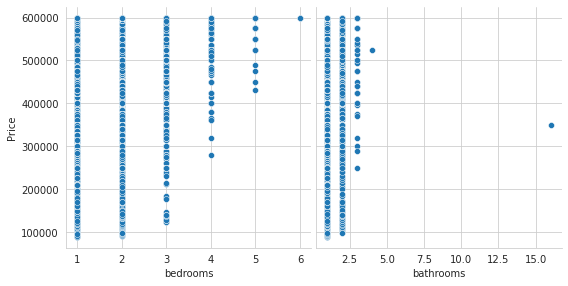

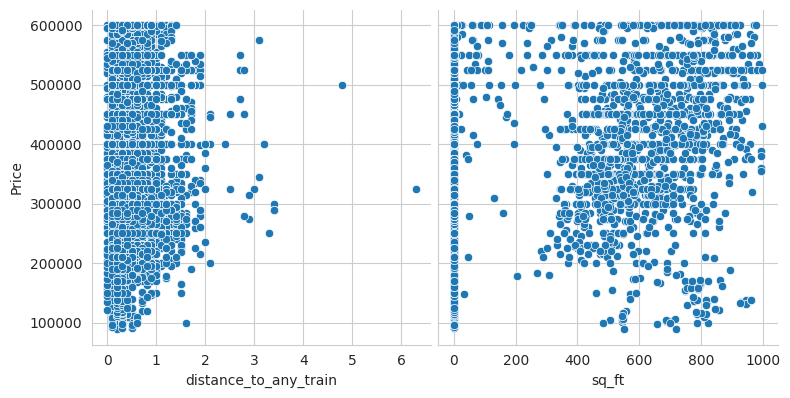

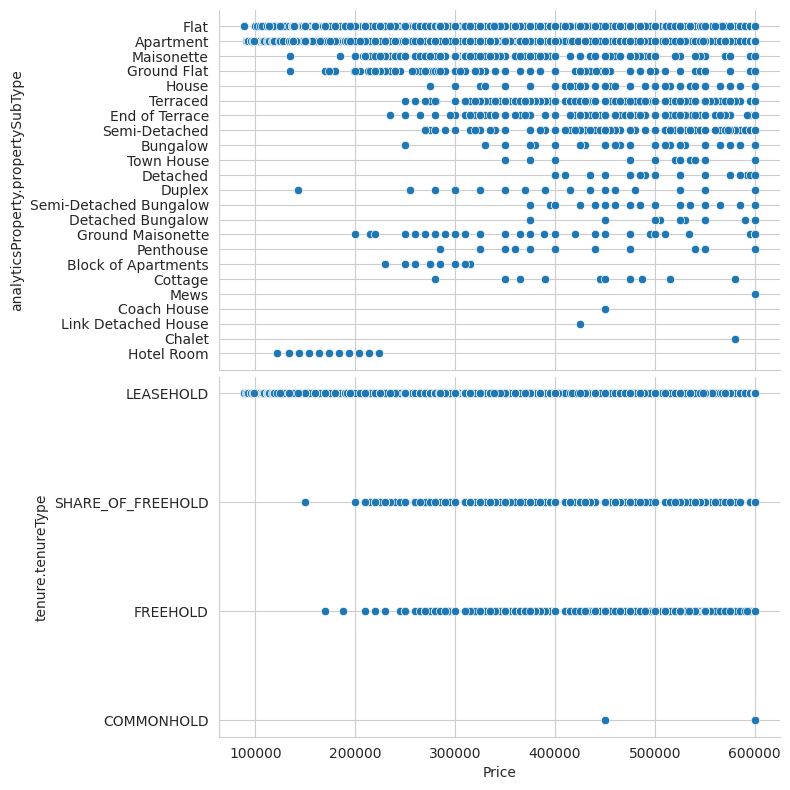

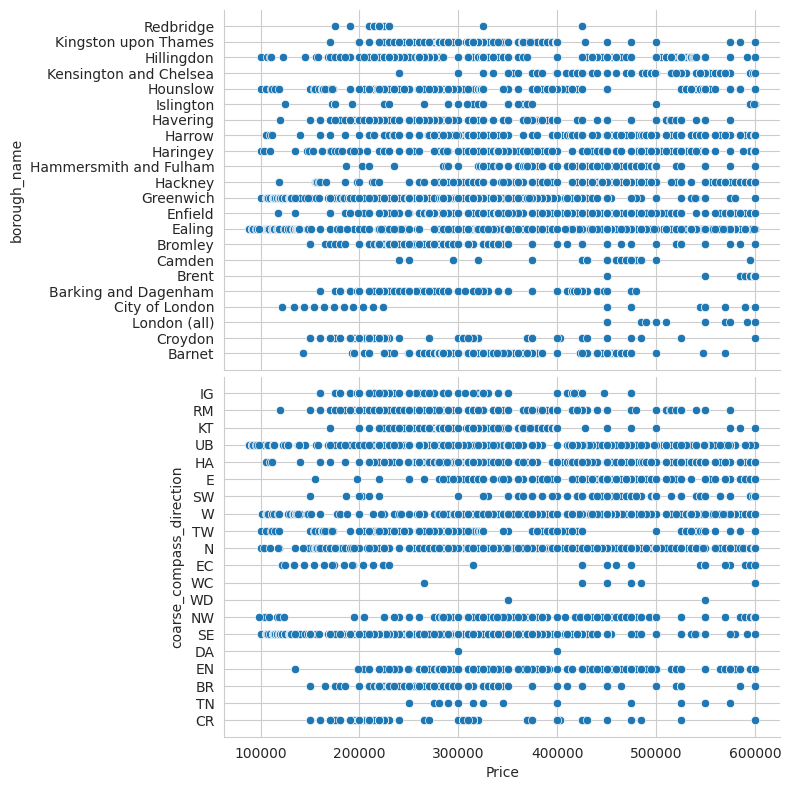

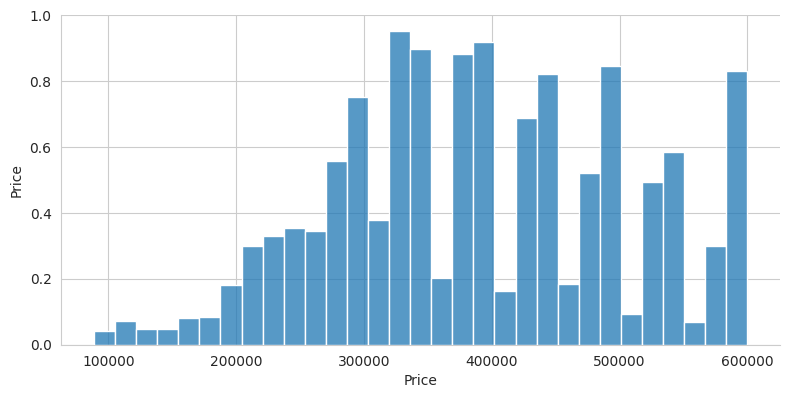

In [9]:
# Using pairplot we'll visualize the data for correlation

#sns.pairplot(df_original, x_vars=['bedrooms', 'postcode','type'],
#plt.figure(figsize=(20,15))
#sns.pairplot(df_original, x_vars=['bedrooms', 'bathrooms','compass','type','Station_Prox','hold_type2','sq_ft','Price','borough'], y_vars='Price', height=4, aspect=4, kind='scatter')
sns.pairplot(df_original, x_vars=['bedrooms', 'bathrooms'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(df_original, x_vars=['distance_to_any_train','sq_ft'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(df_original, y_vars=['analyticsProperty.propertySubType','tenure.tenureType'], x_vars='Price', height=4, aspect=2, kind='scatter') #,rotation=60)
plt.show()

sns.pairplot(df_original, y_vars=['borough_name','coarse_compass_direction'], x_vars='Price', height=4, aspect=2, kind='scatter')
plt.show()

sns.pairplot(df_original, y_vars=['Price'], x_vars='Price', height=4, aspect=2, kind='scatter')
plt.show()

/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


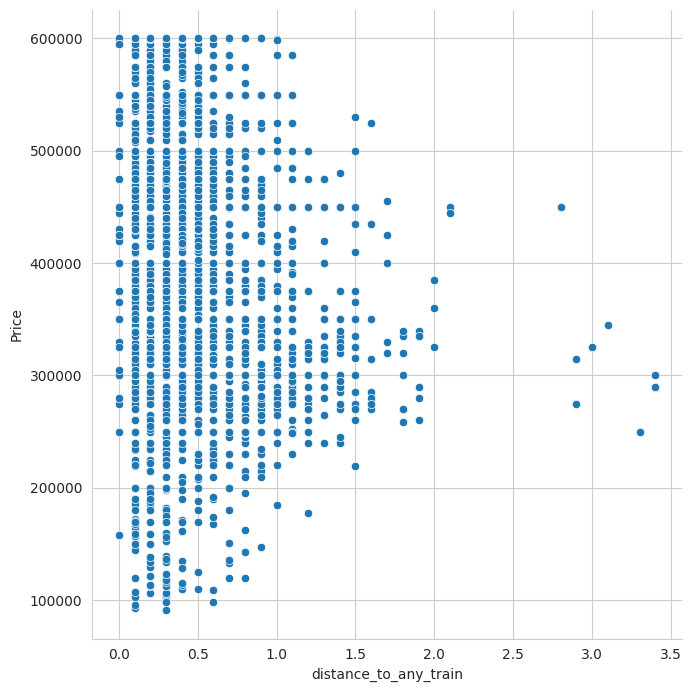

In [10]:
sns.pairplot(df_original[df_original['bedrooms'] == 2], x_vars=['distance_to_any_train'], y_vars='Price', size=7, aspect=1, kind='scatter')
plt.show()

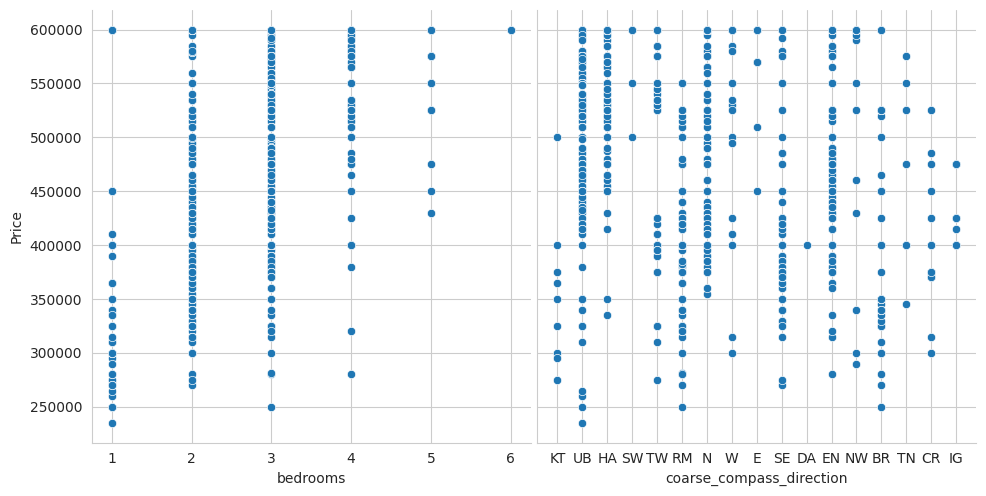

In [11]:
sns.pairplot(df_original[df_original["analyticsProperty.propertyType"] == "Houses"], x_vars=['bedrooms', 'coarse_compass_direction'],
             y_vars='Price', height=5, aspect=1, kind='scatter')
plt.show()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'distance_to_any_train'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'bedrooms_model'}>,
        <AxesSubplot:title={'center':'bathrooms_model'}>,
        <AxesSubplot:title={'center':'location.latitude'}>,
        <AxesSubplot:title={'center':'location.longitude'}>],
       [<AxesSubplot:title={'center':'analyticsBranch.branchId'}>,
        <AxesSubplot:title={'center':'analyticsProperty.added'}>,
        <AxesSubplot:title={'center':'analyticsProperty.beds'}>,
        <AxesSubplot:title={'center':'analyticsProperty.floorplanCount'}>],
       [<AxesSubplot:title={'center':'analyticsProperty.imageCount'}>,
        <AxesSubplot:title={'center':'analyticsProperty.latitude'}>,
        <AxesSubplot:title={'center':'analyticsProperty.longitude'}>,
        <AxesSubplot:title={'center':'analyticsProperty.propert

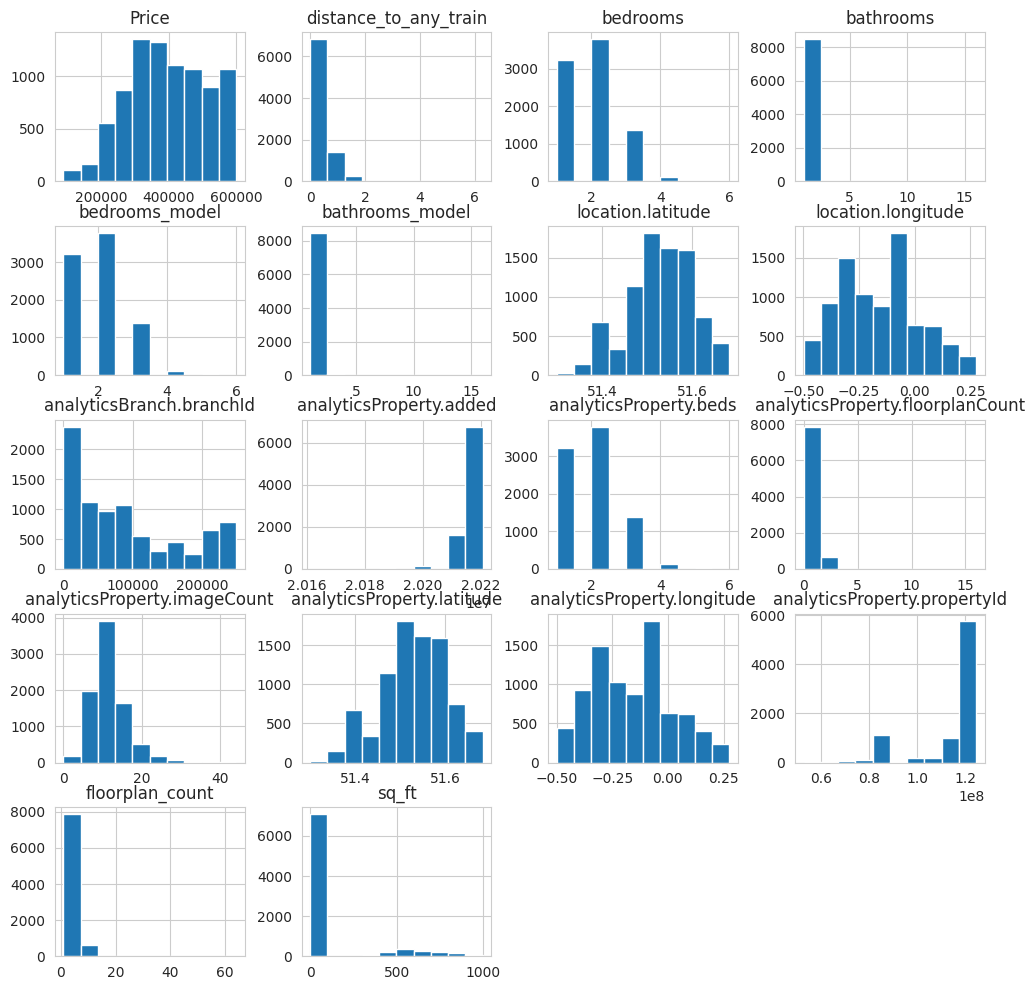

In [12]:
df_original.hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'distance_to_any_train'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'bedrooms_model'}>,
        <AxesSubplot:title={'center':'bathrooms_model'}>,
        <AxesSubplot:title={'center':'location.latitude'}>,
        <AxesSubplot:title={'center':'location.longitude'}>],
       [<AxesSubplot:title={'center':'analyticsBranch.branchId'}>,
        <AxesSubplot:title={'center':'analyticsProperty.added'}>,
        <AxesSubplot:title={'center':'analyticsProperty.beds'}>,
        <AxesSubplot:title={'center':'analyticsProperty.floorplanCount'}>],
       [<AxesSubplot:title={'center':'analyticsProperty.imageCount'}>,
        <AxesSubplot:title={'center':'analyticsProperty.latitude'}>,
        <AxesSubplot:title={'center':'analyticsProperty.longitude'}>,
        <AxesSubplot:title={'center':'analyticsProperty.propert

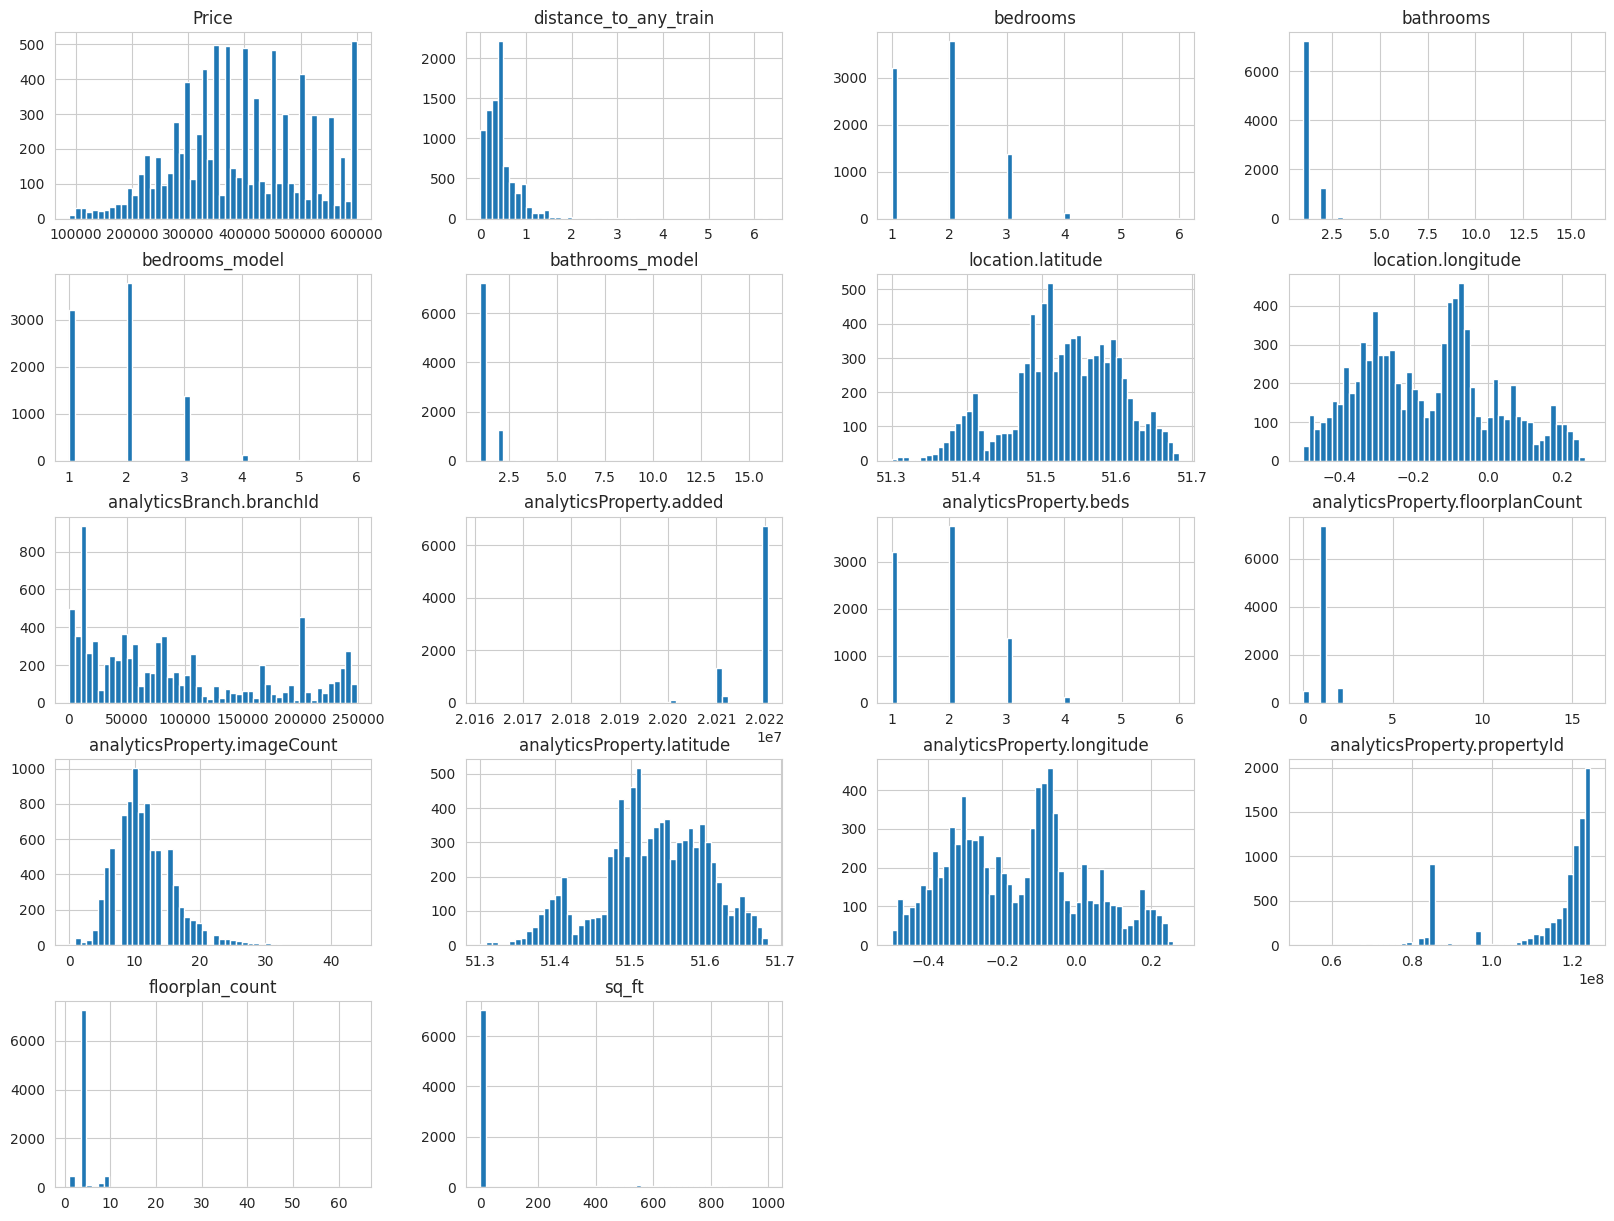

In [13]:
df_original.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'distance_to_any_train'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'bedrooms_model'}>,
        <AxesSubplot:title={'center':'bathrooms_model'}>,
        <AxesSubplot:title={'center':'location.latitude'}>,
        <AxesSubplot:title={'center':'location.longitude'}>],
       [<AxesSubplot:title={'center':'analyticsBranch.branchId'}>,
        <AxesSubplot:title={'center':'analyticsProperty.added'}>,
        <AxesSubplot:title={'center':'analyticsProperty.beds'}>,
        <AxesSubplot:title={'center':'analyticsProperty.floorplanCount'}>],
       [<AxesSubplot:title={'center':'analyticsProperty.imageCount'}>,
        <AxesSubplot:title={'center':'analyticsProperty.latitude'}>,
        <AxesSubplot:title={'center':'analyticsProperty.longitude'}>,
        <AxesSubplot:title={'center':'analyticsProperty.propert

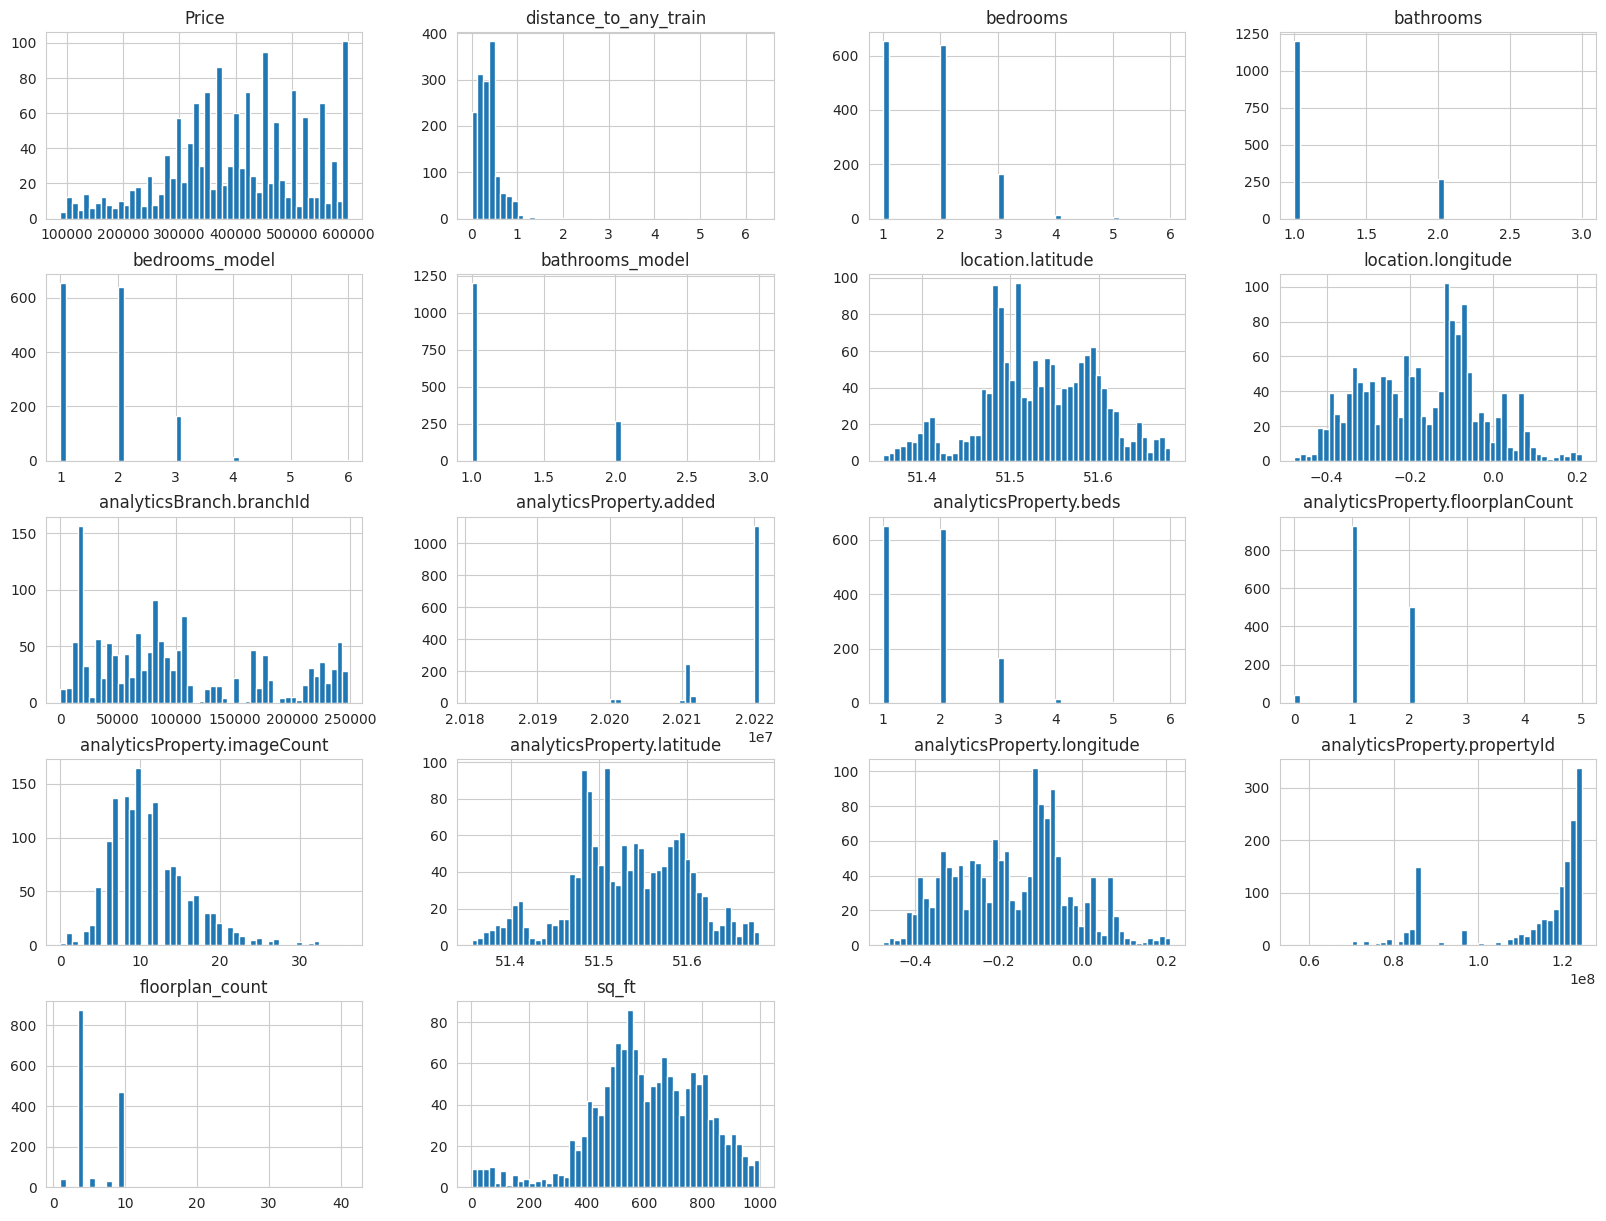

In [14]:
df_original[(df_original['sq_ft'] != -1) & (df_original['Price'] != -1)].hist(bins=50, figsize=(20,15))

In [15]:
df_original["coarse_compass_direction"].value_counts()

N     1434
W     1152
SE     937
UB     842
HA     721
RM     650
TW     435
EN     435
E      368
NW     345
KT     304
BR     293
SW     220
CR     177
IG     125
EC      40
TN      15
WC      10
DA       2
WD       2
Name: coarse_compass_direction, dtype: int64

In [16]:
df_original["analyticsProperty.propertyType"].value_counts()

Flats / Apartments    6949
Houses                1467
Bungalows               91
Name: analyticsProperty.propertyType, dtype: int64

In [17]:
df_original["analyticsProperty.propertySubType"].value_counts()

Flat                      3536
Apartment                 2598
Terraced                   694
Maisonette                 577
Semi-Detached              392
End of Terrace             262
Ground Flat                139
House                       59
Ground Maisonette           42
Bungalow                    42
Semi-Detached Bungalow      34
Detached                    25
Town House                  20
Duplex                      18
Detached Bungalow           15
Penthouse                   15
Block of Apartments         12
Cottage                     12
Hotel Room                  11
Mews                         1
Coach House                  1
Link Detached House          1
Chalet                       1
Name: analyticsProperty.propertySubType, dtype: int64

In [18]:
# for each in df_original.columns:
#
#     if each not in ['other_key_info','bullet_points','station_info','long_description','add_info']:
#         print(each)
#         print(df_original[each].value_counts())

In [19]:
df_original.iloc[:,:-1].shape,df_original.iloc[:,-1].shape,df_original["Price"].shape

((8507, 76), (8507,), (8507,))